# Randomised Control Trial - Simulated Case

### Megha Dharmesh

## Introduction

A pharmaceutical company conducts a randomised control trial for a drug against a hypothetical disease called "NeuroBlastia" which is a neurological disorder characterized by abnormal growths in the nervous system. For this disease, we can consider a relevant biomarker called "NeuroBlastia Protein (NBP)" which is believed to be elevated (>40) in patients with NeuroBlastia.

Adults aged 18-50 undergo the randomised control clinical trial.
Parameters of the population: 18-50 years of age, varying levels of NBP
Random sample taken from this simulated population
NBP threshold to be considered for sample: >40

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

## Simulation of population and generation of hypothetical randomised control trial data

In [ ]:
# Define parameters
population_size = 10000
sample_size = 2000  # Desired sample size

age_mean = 40
age_std = 10
male_ratio = 0.5     # 50% of the population are male

# Generate age data for the entire population, normal distribution
age_data = np.random.normal(loc=age_mean, scale=age_std, size=population_size).astype(int)
age_data = np.clip(age_data, 18, 90)  # Ensure ages are within the desired range

# Assign gender
males = np.random.choice(["Male", "Female"], size=population_size, p=[male_ratio, 1-male_ratio])

# Generate NBP levels (biomarker)
# For NeuroBlastia patients, NBP levels are elevated
nbp_levels_neuroblastia = np.random.normal(loc=50, scale=15, size=population_size)

# Combine age, gender, and NBP levels
population = {
    'age': age_data,
    'gender': males,
    'NBP': nbp_levels_neuroblastia
}

# Filter the population to include only individuals with high NBP levels (NeuroBlastia patients)
high_nbp_indices = np.where(nbp_levels_neuroblastia > 40)[0]
population_filtered = {key: value[high_nbp_indices] for key, value in population.items()}

# Select a sample from the filtered population
sample_indices = np.random.choice(len(high_nbp_indices), size=sample_size, replace=False)

# Sample from the filtered population based on the selected indices
sample_age = population_filtered['age'][sample_indices]
sample_gender = population_filtered['gender'][sample_indices]
sample_nbp = population_filtered['NBP'][sample_indices]

# Create a control group
control_size = int(sample_size * 0.5)  # 50% of the sample for control group
treatment_size = sample_size - control_size  # Remaining 50% for treatment group

# Simulate higher NBP for control group
control_nbp = np.random.normal(loc=52, scale=15, size=control_size)
treatment_nbp = np.random.normal(loc=50, scale=15, size=treatment_size)

# Simulate adverse reaction (higher for control group)
control_adverse_reaction = np.random.choice([0, 1], size=control_size, p=[0.6, 0.4])  # higher chance of adverse reaction for control
treatment_adverse_reaction = np.random.choice([0, 1], size=treatment_size, p=[0.8, 0.2])  # lower chance of adverse reaction for treatment

# Simulate side effect (drowsiness) (slightly higher for treatment group)
control_side_effect_drowsiness = np.random.choice([0, 1], size=control_size, p=[0.9, 0.1])  # lower chance of drowsiness side effect for control
treatment_side_effect_drowsiness = np.random.choice([0, 1], size=treatment_size, p=[0.85, 0.15])  # higher chance of drowsiness side effect for treatment

# Concatenate control and treatment samples
sample_age = np.concatenate((sample_age[:control_size], sample_age[:treatment_size]))
sample_gender = np.concatenate((sample_gender[:control_size], sample_gender[:treatment_size]))
sample_nbp = np.round(np.concatenate((control_nbp, treatment_nbp)), 2)
sample_adverse_reaction = np.concatenate((control_adverse_reaction, treatment_adverse_reaction))
sample_side_effect_drowsiness = np.concatenate((control_side_effect_drowsiness, treatment_side_effect_drowsiness))

# Create DataFrame
sample_data = pd.DataFrame({
    'Age': sample_age,
    'Gender': sample_gender,
    'NBP': sample_nbp,
    'Adverse Reaction': sample_adverse_reaction,
    'Side Effect (Drowsiness)': sample_side_effect_drowsiness
})

# Create a column for control/treatment
sample_data['Group'] = np.concatenate((['Control'] * control_size, ['Treatment'] * treatment_size))

# Create patient_id column with unique IDs from 1 to sample_size
sample_data['Patient_ID'] = np.arange(1, sample_size + 1)

print(sample_data.head())


## Primary Hypothesis
### Null Hypothesis(H0): No significant difference in the NBP levels between Control and Treatment groups
### Alternative Hypothesis(H1): There is a significant difference in the NBP levels between Control and Treatment groups

T-Test

In [20]:
# Perform hypothesis test for NBP reduction
control_mean_nbp = np.mean(control_nbp).round(2)
treatment_mean_nbp = np.mean(treatment_nbp).round(2)

print("Mean NBP for Control Group:", control_mean_nbp)
print("Mean NBP for Treatment Group:", treatment_mean_nbp)

# Perform t-test for independent samples
t_stat, p_value = stats.ttest_ind(control_nbp, treatment_nbp)
print("T-statistic:", t_stat)
print("P-value:", p_value)


Mean NBP for Control Group: 52.59
Mean NBP for Treatment Group: 50.96
T-statistic: 2.3924505020917923
P-value: 0.016828168910850774


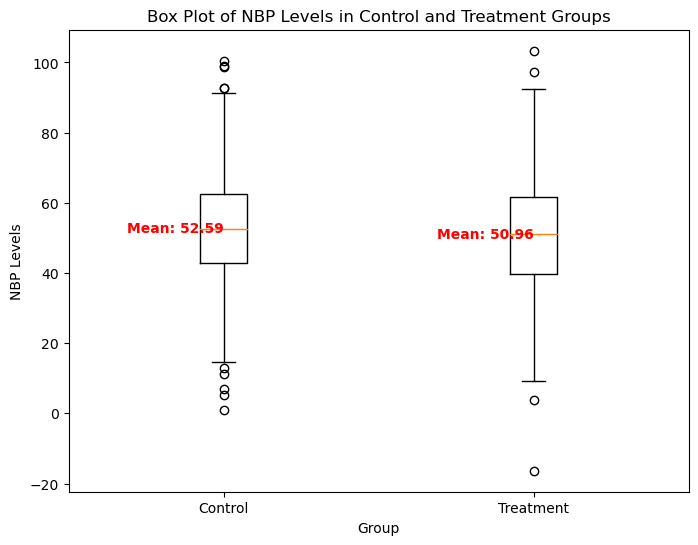

In [21]:
# Box plot for NBP levels in control and treatment groups
plt.figure(figsize=(8, 6))
plt.boxplot([control_nbp, treatment_nbp], labels=['Control', 'Treatment'])
plt.title('Box Plot of NBP Levels in Control and Treatment Groups')
plt.ylabel('NBP Levels')
plt.xlabel('Group')

# Calculate mean values
control_mean = np.mean(control_nbp)
treatment_mean = np.mean(treatment_nbp)

# Add mean values to the plot
plt.text(1, control_mean, f'Mean: {control_mean:.2f}', ha='right', va='center', color='red', fontweight='bold')
plt.text(2, treatment_mean, f'Mean: {treatment_mean:.2f}', ha='right', va='center', color='red', fontweight='bold')

plt.show()


## Secondary Hypothesis 1
### Null Hypothesis(H0): No significant difference in the occurance of adverse reaction between Control and Treatment groups
### Alternative Hypothesis(H1): There is a significant difference in the occurance of adverse reaction between Control and Treatment groups

In [28]:
# Perform chi-square test for adverse effect
adverse_contingency_table = pd.crosstab(sample_data['Adverse Reaction'], sample_data['Group'])
chi2_adverse, p_adverse, dof_adverse, _ = chi2_contingency(adverse_contingency_table)

print("Chi-square statistic for adverse effect:", chi2_adverse)
print("P-value for adverse effect:", p_adverse)
print("Degrees of freedom for adverse effect:", dof_adverse)


Chi-square statistic for adverse effect: 96.93882447788698
P-value for adverse effect: 7.150277193428772e-23
Degrees of freedom for adverse effect: 1


<Figure size 800x600 with 0 Axes>

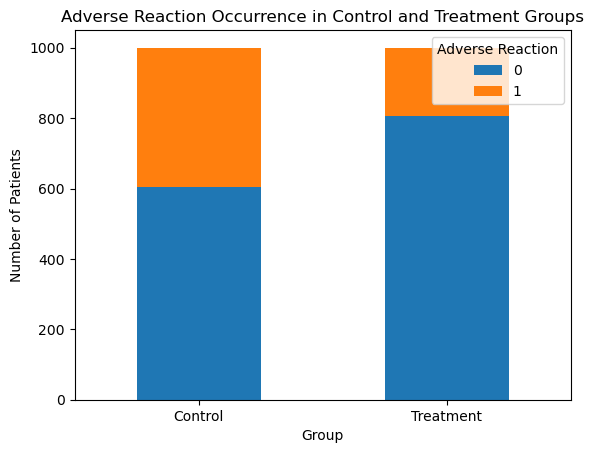

In [23]:
# Bar plot for adverse reaction occurrence in control and treatment groups
adverse_reaction_counts = sample_data.groupby('Group')['Adverse Reaction'].value_counts().unstack()

plt.figure(figsize=(8, 6))
adverse_reaction_counts.plot(kind='bar', stacked=True)
plt.title('Adverse Reaction Occurrence in Control and Treatment Groups')
plt.ylabel('Number of Patients')
plt.xlabel('Group')
plt.xticks(rotation=0)
plt.legend(title='Adverse Reaction', loc='upper right')
plt.show()


## Secondary Hypothesis 2
### Null Hypothesis(H0): No significant difference in the presence of drowsiness between Control and Treatment groups
### Alternative Hypothesis(H1): There is a significant difference in the presence of drowsiness between Control and Treatment groups

In [33]:
# Perform chi-square test for drowsiness
drowsiness_contingency_table = pd.crosstab(sample_data['Side Effect (Drowsiness)'], sample_data['Group'])
chi2_drowsiness, p_drowsiness, dof_drowsiness, _ = chi2_contingency(drowsiness_contingency_table)

print("\nChi-square statistic for drowsiness:", chi2_drowsiness)
print("P-value for drowsiness:", p_drowsiness)
print("Degrees of freedom for drowsiness:", dof_drowsiness)



Chi-square statistic for drowsiness: 14.640260959626758
P-value for drowsiness: 0.0001301051929283403
Degrees of freedom for drowsiness: 1


<Figure size 800x600 with 0 Axes>

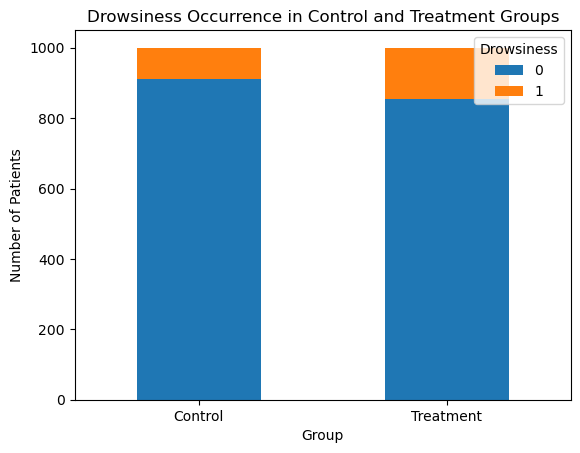

In [25]:
# Bar plot for drowsiness occurrence in control and treatment groups
drowsiness_counts = sample_data.groupby('Group')['Side Effect (Drowsiness)'].value_counts().unstack()

plt.figure(figsize=(8, 6))
drowsiness_counts.plot(kind='bar', stacked=True)
plt.title('Drowsiness Occurrence in Control and Treatment Groups')
plt.ylabel('Number of Patients')
plt.xlabel('Group')
plt.xticks(rotation=0)
plt.legend(title='Drowsiness', loc='upper right')
plt.show()


## Secondary Hypothesis 3
### Null hypothesis (H0): There is no correlation between age and NBP levels (correlation coefficient = 0).
### Alternative hypothesis (H1): There is a correlation between age and NBP levels (correlation coefficient ≠ 0).

In [31]:
# Perform correlation analysis between age and NBP levels
correlation_coefficient = sample_data['Age'].corr(sample_data['NBP'])

print("Correlation coefficient between Age and NBP levels:", correlation_coefficient)


Correlation coefficient between Age and NBP levels: 0.04762556132556965


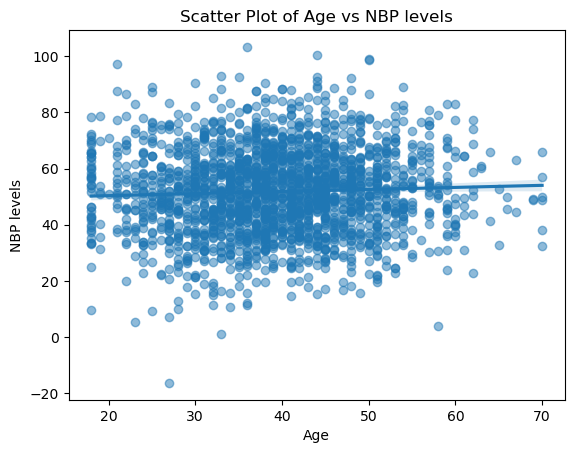

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plot with regression line
sns.regplot(x='Age', y='NBP', data=sample_data, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot of Age vs NBP levels')
plt.xlabel('Age')
plt.ylabel('NBP levels')
plt.show()
